In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lbg_forecast.nz_model as nz
from lbg_forecast.nz_model import NzModel

In [2]:
def gather_redshifts(nfiles, path):
    i = 0
    nz_data = []
    while(i < nfiles):
        nzs = np.load(path+"redshifts/emulated_redshifts_"+str(i)+".npy", allow_pickle=True)
        nsamples = nzs.shape[0]
        j = 0
        while(j < nsamples):
            nz_data.append(nzs[j, :])
            j+=1
        i+=1

    return np.asarray(nz_data)

In [3]:
def process_redshifts(nzs, bin_size, path):
     
    dz = bin_size
    minz = 0.0
    maxz = 7.0
    bins = np.arange(minz, maxz+dz, dz)

    z_grid = (bins[1:] + bins[0:-1])/2

    dropout = 0
    sample = 0
    nsamples = nzs.shape[0]
    newnzs = np.empty(3, dtype=object)
    while(dropout < 3):
        dropouts = []
        sample = 0
        while(sample < nsamples):
            nzhist = np.histogram(nzs[sample, dropout], density=True, bins=bins)
            dropouts.append(nzhist[0])
            sample+=1
        dropouts = np.asarray(dropouts)
        newnzs[dropout] = dropouts
        dropout+=1
    
    np.save(path+"redshifts/nzus.npy", newnzs[0])
    np.save(path+"redshifts/nzgs.npy", newnzs[1])
    np.save(path+"redshifts/nzrs.npy", newnzs[2])
    np.save(path+"redshifts/z_grid.npy", z_grid)

    return z_grid, newnzs
               


In [4]:
nzs = gather_redshifts(1, path="./")
total_nzs = len(nzs)
print("total nzs:", total_nzs)

total nzs: 1024


In [5]:
z_grid, nz_pdfs = process_redshifts(nzs, 0.1, path="./")

In [6]:
nzmodel = NzModel(path="./")

/Users/fpetri/repos/LBGforecast/lbg_forecast/nz_model.py:282: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=0, fontsize= 24, frameon=False, ncols=3)


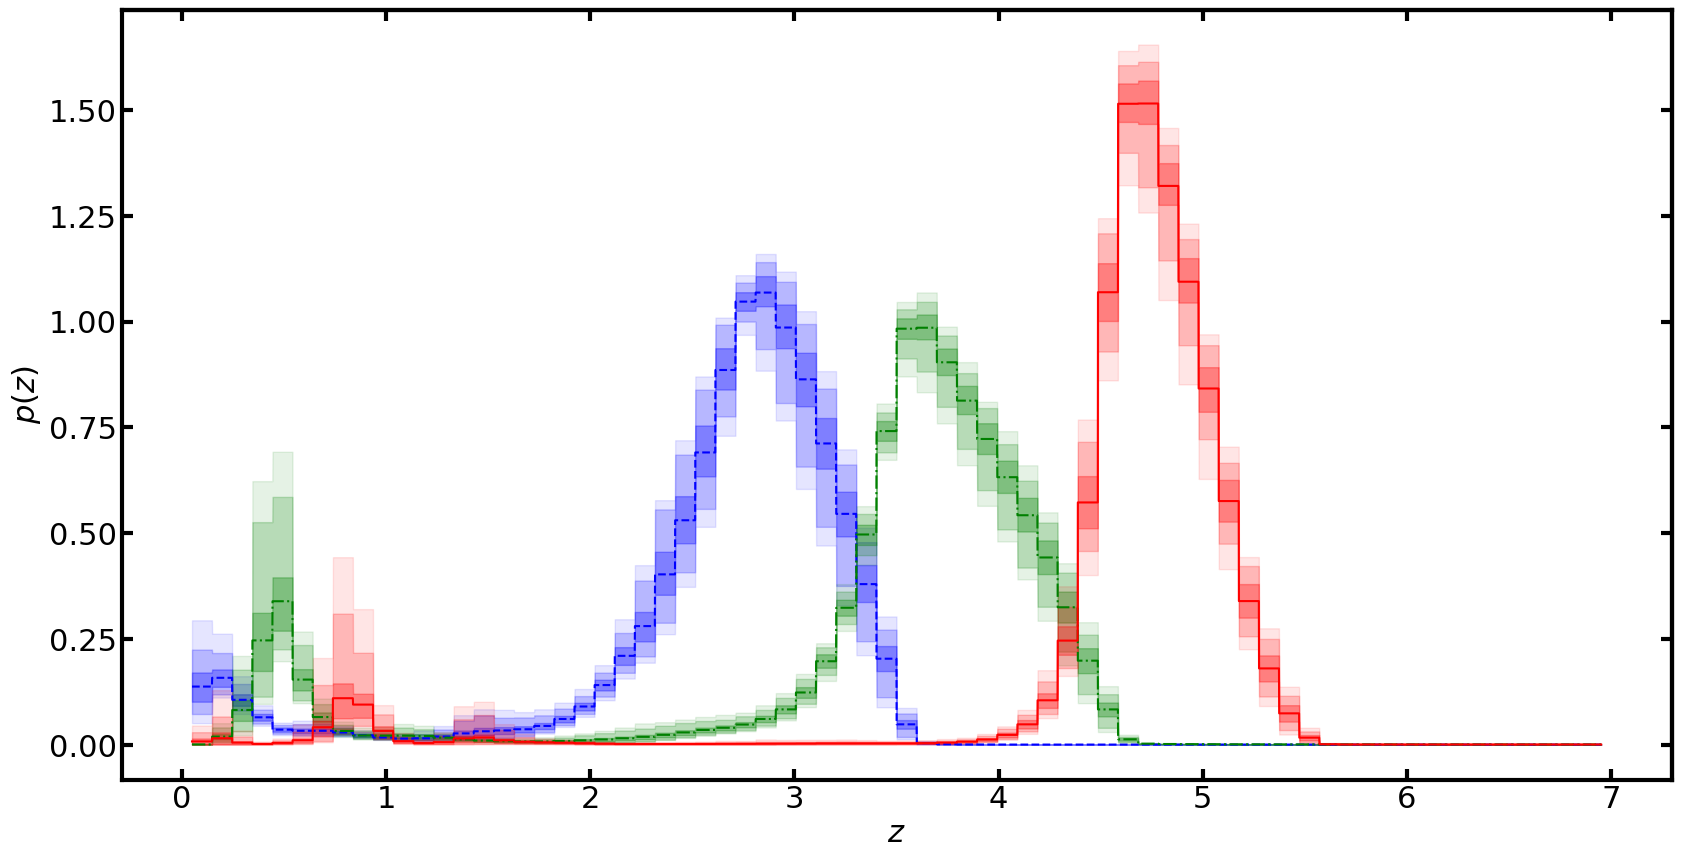

In [7]:
nzmodel.plot_all_data()

[2.54546432e-02 3.79992148e-03 9.56353994e-04 4.88789669e-04
 1.65046264e-04 1.28176222e-04 1.06258021e-04 9.27510406e-05
 6.35394241e-05 6.09473203e-05 5.68049022e-05 5.48526569e-05
 5.38825145e-05 5.29714890e-05 5.14297813e-05 4.91960781e-05
 4.78806941e-05 4.67210477e-05 4.60963171e-05 4.54163160e-05
 4.53243830e-05 4.37570774e-05 4.31315480e-05 4.13318322e-05
 4.01150965e-05 3.99038951e-05 3.88971533e-05 3.80596922e-05
 3.65575353e-05 3.58946602e-05 3.45671587e-05 3.42705130e-05
 3.29213629e-05 3.22389398e-05 3.19224375e-05 3.12347068e-05
 3.02133033e-05 3.01167864e-05 2.83870643e-05 2.53499236e-05
 1.86768567e-05 5.03709827e-06 9.43354764e-07 2.53599815e-07
 1.49375866e-07 1.30900182e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[2.54546432e-02 3.79992148e-03 9.56353994e-04 4.88789669e-04
 1.65046264e-04 1.28176222e-04 1.06258021e-04 9.27510406e-05
 6.35394241e-05 6.09473203e-05 5.68049022e-05 5.48526569e-05
 5.38825145e-05 5.29714890e-05 5.14297813e-05 4.91960

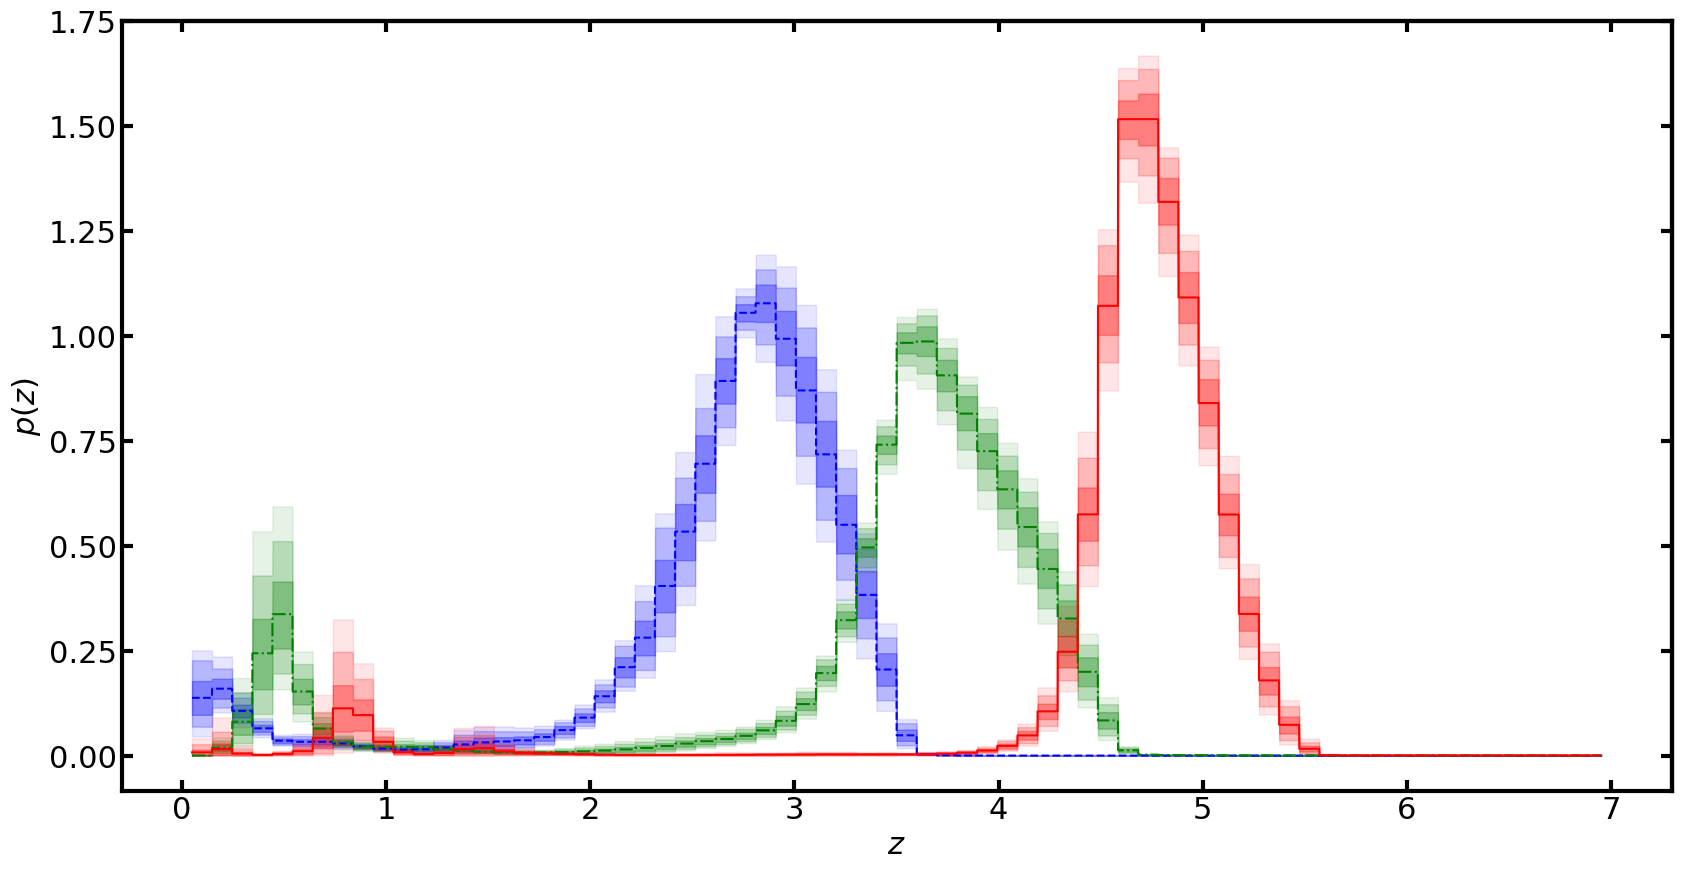

In [8]:
nzmodel.plot_all_pca(50, 1000)

In [9]:
nzmodel.save_npca_data(50, "./")